In [1]:
%matplotlib inline


# TiO2/SiO2 Bragg mirror


## Example of a TiO2/SiO2 Bragg mirror with 8.5 periods

Authors: O. Castany, M.Müller



In [2]:
import elli
import elli.plot as elliplot
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True, precision=3)

## Material definition
We define air as incidence material and glass as exit material.
SiO2 and TiO2 are defined by simplified dispersion relations.



In [3]:
air = elli.AIR
glass = elli.ConstantRefractiveIndex(1.5).get_mat()

n_SiO2 = 1.47
n_TiO2 = 2.23 + 1j * 5.2e-4

SiO2 = elli.ConstantRefractiveIndex(n_SiO2).get_mat()
TiO2 = elli.ConstantRefractiveIndex(n_TiO2).get_mat()

## Create layers and structure
The SiO2 and TiO2 layers are set to the thickness of an
quarterwaveplate of the respective material at 1550 nm.

The layers are then stacked alternatingly and put into the
complete structure with air and the glass substrate.



In [4]:
lbda0 = 1550

d_SiO2 = elli.get_qwp_thickness(SiO2, lbda0)
d_TiO2 = elli.get_qwp_thickness(TiO2, lbda0)

print("Thickness of the SiO2 QWP: {} nm".format(d_SiO2))
print("Thickness of the TiO2 QWP: {} nm".format(d_TiO2))

L_SiO2 = elli.Layer(SiO2, d_SiO2)
L_TiO2 = elli.Layer(TiO2, d_TiO2)

# Repeated layers: 8.5 periods
layerstack = elli.RepeatedLayers([L_TiO2, L_SiO2], 8, 0, 1)

s = elli.Structure(air, [layerstack], glass)

Thickness of the SiO2 QWP: 263.6054421768708 nm
Thickness of the TiO2 QWP: 173.76681614349775 nm


## Calculation



In [5]:
(lbda1, lbda2) = (1100, 2500)
lbda_list = np.linspace(lbda1, lbda2, 200)

data = s.evaluate(lbda_list, 0)

R = data.R
T = data.T

## Structure Graph
Schema of the variation of the refractive index in z-direction.



<Axes: xlabel='z (nm)', ylabel="n'">

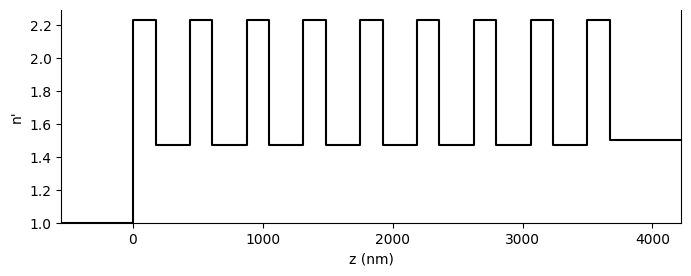

In [6]:
elliplot.draw_structure(s)

## Reflection and Transmission Graph



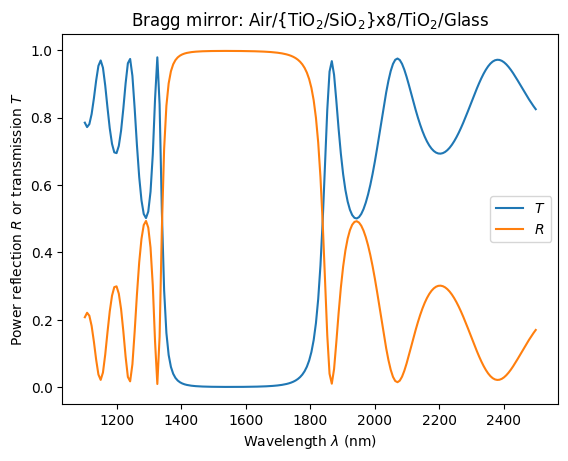

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(lbda_list, T, label="$T$")
ax.plot(lbda_list, R, label="$R$")
ax.legend(loc="center right")
ax.set_xlabel(r"Wavelength $\lambda$ (nm)")
ax.set_ylabel(r"Power reflection $R$ or transmission $T$")
ax.set_title(r"Bragg mirror: Air/{TiO$_2$/SiO$_2$}x8/TiO$_2$/Glass")
plt.show()